In [23]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

# Setup Tweepy API Authentication -2
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [24]:
news_outlets = ['nytimes', 'cnn', 'bbc','cbs', 'fox' ]
#news_outlets = ['nytimes' ]

#### Pull last 100 tweets from each outlet.
#### Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
#### Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
#### Export the data in the DataFrame into a CSV file.
#### Save PNG images for each plot.


In [54]:
# Array of news outlets
tweet_count = 100

news_sentiment_analysis = pd.DataFrame()

for target_outlet in news_outlets :
    news_media = []
    positive = []
    neutral = []
    negative = []
    compound = []
    create_date = []
    tweets_ago = []
    # Target User

    # Loop through 50 pages of 


    # Get all tweets from home feed
    #TODO Search for twitter handle and any tweets 1500 
    public_tweets = api.user_timeline(target_outlet, count=tweet_count)

    # Loop through all tweets
    #TODO Pull the text and put each tweet in its own list for the  twitter handle
    i = 0
    for tweet in public_tweets:
        #print(tweet)
        # Break tweet text into an array of lowercase words
        tweet_text = tweet["text"]
        #Sentiment Analysis
        positive.append(analyzer.polarity_scores(tweet_text)["pos"])
        neutral.append(analyzer.polarity_scores(tweet_text)["neu"])
        negative.append(analyzer.polarity_scores(tweet_text)["neg"])
        compound.append(analyzer.polarity_scores(tweet_text)["compound"])
        create_date.append(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")) 
        news_media.append(tweet['user']['screen_name'])
        tweets_ago.append(i)
        i=i-1               
 

    data = pd.DataFrame({"news_media": news_media,
                         "positive": positive,
                         "neutral": neutral,
                         "negative": negative,
                         "compound": compound,
                         "create_date": create_date,
                         "tweets_ago":tweets_ago
                       })
    news_sentiment_analysis = news_sentiment_analysis.append(data)  

news_sentiment_analysis.set_index('news_media', 'create_date')
news_sentiment_analysis.to_csv("./output/news_media_sentiment_analysis.csv")

In [71]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='nytimes']['tweets_ago']
compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='nytimes']['compound']


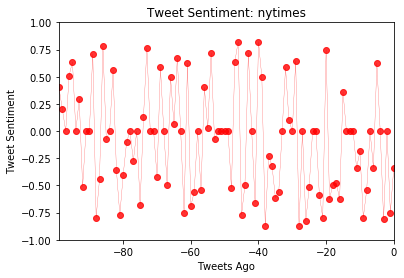

In [72]:
# Plot Time Between Twets

# Plot Time Between Twets
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.8, color="r")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
#plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'nytimes')
plt.show()